In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

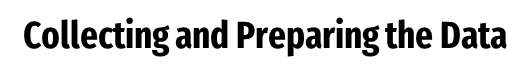

# About Dataset


**Description:**
This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

**Key Features:**
* A_id: Unique identifier for each fruit
* Size: Size of the fruit
* Weight: Weight of the fruit
* Sweetness: Degree of sweetness of the fruit
* Crunchiness: Texture indicating the crunchiness of the fruit
* Juiciness: Level of juiciness of the fruit
* Ripeness: Stage of ripeness of the fruit
* Acidity: Acidity level of the fruit
* Quality: Overall quality of the fruit

In [99]:
df=pd.read_csv('apple_quality.csv')

In [100]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [102]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [103]:
df.dropna(inplace=True)

In [104]:
df.duplicated().sum()

0

In [105]:
df.shape

(4000, 9)

In [106]:
df.drop('A_id',axis=1,inplace=True)

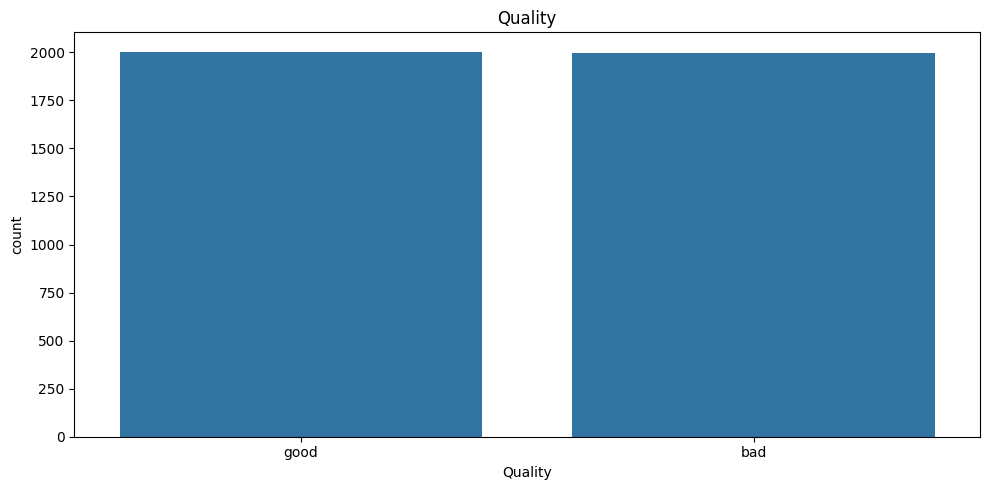

In [107]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Quality'],data=df)
plt.title('Quality')
plt.tight_layout()
plt.show()

In [108]:
df['Quality'] = df['Quality'].str.replace('good', '1').str.replace('bad', '0').astype(int)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


In [109]:
x = df[df.columns[:-1]]
y = df['Quality']

In [110]:
scaler = MinMaxScaler()
columns = x.columns
x = pd.DataFrame(scaler.fit_transform(x))
x.columns = columns
x.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225
1,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185
2,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192
3,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180
4,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150


In [111]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42)

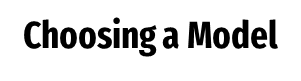

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

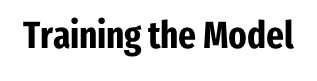

In [113]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

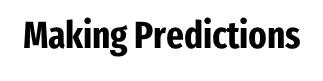

In [114]:
# Make predictions on the test data
y_pred = knn.predict(x_test)

In [115]:
# Calculate accuracy on the test set
knn_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

# Print the accuracy
print('Accuracy =', knn_test_acc, '%')

Accuracy = 89.12 %


# **Test new data**

In [116]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names, but KNeighborsClassifier was fitted with feature names")

In [117]:
# Preprocess the single example (assuming it's a dictionary with the same features)
single_example = {
    'Size': [4.23],         # Example Size of an apple
    'Weight': [1.35],        # Example weight of an apple
    'Sweetness': [0.65],    # Example sweetness rating
    'Crunchiness': [0.75],  # Example crunchiness rating
    'Juiciness': [-0.55],    # Example juiciness rating
    'Ripeness': [1.72],     # Example ripeness rating
    'Acidity': [0.35]       # Example acidity rating
}

# Create a DataFrame from the single example
single_example_df = pd.DataFrame(single_example)

# Apply the same preprocessing steps as you did for the training data
# Scale the features using the MinMaxScaler
single_example_scaled = scaler.fit_transform(single_example_df)

# Make prediction using the trained KNN model
predicted_class = knn.predict(single_example_scaled)

# Print the predicted quality class
print("Predicted Quality Class:", predicted_class[0])

Predicted Quality Class: 0
